# Imports

In [1]:
from queue import PriorityQueue as priority_queue
import random
import numpy as np
import pandas as pd
import functools
import time
import seaborn as sb
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import Any
import heapq
sb.set()

## Timer Decorator

In [2]:
def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start = time.perf_counter()
        value = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"Time taken to run the function: {elapsed} seconds")
        return value
    return wrapper_timer

## Array implementation of Priority Queue

In [3]:
# PQ should be implemented adding in tuples (vertex, weight)
class PriorityQueue(object):
    def __init__(self):
        self.queue = []
  
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
  
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
  
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
        # self.queue.sort(key=lambda tup: tup[1])
  
    # for popping an element based on smallest dist
    def extractCheapest(self):
        try:
            minimum = 0
            min_tuple = self.queue[minimum]
            minimum_initial = min_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare < minimum_initial:
                    minimum_initial = to_compare
                    minimum = i
            item = self.queue[minimum]
            del self.queue[minimum]
            return item
        except IndexError:
            print()
            exit()
    
    def delete(self):
        try:
            maximum = 0
            max_tuple = self.queue[maximum]
            maximum_initial = max_tuple[1]
            for i in range(len(self.queue)):
                tuple = self.queue[i]
                to_compare = tuple[1]
                if to_compare > maximum_initial:
                    maximum_initial = to_compare
                    maximum = i
            item = self.queue[maximum]
            del self.queue[maximum]
            return item
        except IndexError:
            print()
            exit()
    
    def peek(self): 
        return self.queue[0]

# TESTING PRIORITY QUEUE
if __name__ == '__main__':
    myQueue = PriorityQueue()
    myQueue.insert((12, 1))
    myQueue.insert((7, 4))
    myQueue.insert((14, 3))
    myQueue.insert((1, 2)) 
    print(myQueue)            
    while not myQueue.isEmpty():
        # print(myQueue.extractCheapest())
        print(myQueue.delete()) 

(12, 1) (7, 4) (14, 3) (1, 2)
(7, 4)
(14, 3)
(1, 2)
(12, 1)


## Array implementation of Priority Queue ver 2

In [4]:
class handmade_prio_q():
    def __init__(self):
        self.array = []
    
    def add_object(self, item, priority):
        temp_tuple = (item, priority)
        self.array.append(temp_tuple)
        self.array.sort(key = lambda x: x[1])

    def del_object(self, item):
        index = 0
        for i in self.array:
            if (i[0] == item):
                self.array.pop(index)
                return
            index += 1
    
    def is_empty(self):
        return not bool(len(self.array))

# Matrix Graph

In [5]:
# class Graph_0: 

#     # Constructor 
#     def __init__(self, vertices):
#         self.V = vertices # number of vertices 
#         self.graph = [[float('inf') for column in range(vertices)] for row in range(vertices)] # creates the matrix 

#     # Method to add edges 
#     def add_edge(self, u, v, dist):
#         self.graph[u][v] = dist
#         # self.graph[v][u] = dist

#     # Shortest path algo 
#     def dijkstra_shortest_path(self, start): 
#         dist = [float('inf')] * self.V
#         pi = [-1] * self.V
#         Set = [False] * self.V 
        
#         dist[start] = 0
#         priority_queue = PriorityQueue()

#         # put everything into a pq 
#         for i in range(self.V):
#             priority_queue.insert((i ,self.graph[i][0]))
#         # print(priority_queue)
        

#         while not priority_queue.isEmpty():
#             # u = self.find_min(dist, Set)
#             # print(priority_queue)
#             current_tuple = priority_queue.extractCheapest()
#             # print(current_tuple)
#             u = current_tuple[0]
#             # print(u+1)
#             # print(Set)
#             # print(dist)
#             Set[u] = True 
            

#             for neighbour in range(self.V):
#                 # If it is a neighbour
#                 # and not yet visited 
#                 if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
#                     # ERROR WITH DELETING NEIGHBOURS 
#                     priority_queue.delete()
#                     # print(u, neighbour, dist[neighbour])

#                     dist[neighbour] = dist[u] + self.graph[u][neighbour]
#                     pi[neighbour] = u + 1
#                     priority_queue.insert((neighbour, dist[neighbour]))
                

 
#         self.printSolution(dist)
#             # print(pi)

#     def printSolution(self, dist):
#         print ("Vertex \tDistance from Source")
#         for node in range(self.V):
#             print (node, "\t", dist[node])

In [6]:
# Graph Class with jovian's prio queue, currently working

class Graph: 

    # Constructor 
    def __init__(self, vertices):
        self.V = vertices # number of vertices 
        self.graph = [[float('inf') for column in range(vertices + 1)] for row in range(vertices + 1)] # creates the matrix  # 0,0 is offset node 0 is offset
        self.pi = []
        self.edge = 0

    # Method to add edges 
    def add_edge(self, u, v, dist):
        self.graph[u][v] = dist
        self.edge += 1

    # Shortest path algo
    # @timer
    def dijkstra_shortest_path(self, start = 1, print = True):
        start_time = time.perf_counter()
        dist = [float('inf')] * (self.V + 1)
        pi = [None] * (self.V + 1)
        Set = [False] * (self.V + 1) 
        
        dist[start] = 0
        pq = handmade_prio_q()

        # put everything into a pq 
        for i in range(1, self.V + 1):
            pq.add_object(i, self.graph[i][0])    

        while not pq.is_empty():

            current_tuple = pq.array[0]
            pq.del_object(pq.array[0][0])        
            u = current_tuple[0]
            Set[u] = True 
            

            for neighbour in range(1, self.V + 1):
                # If it is a neighbour
                # and not yet visited 
                if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
                    pq.del_object(neighbour)
                    dist[neighbour] = dist[u] + self.graph[u][neighbour]
                    pi[neighbour] = u
                    pq.add_object(neighbour, dist[neighbour])
                

        end = time.perf_counter()
        time_taken = end - start_time
        self.pi = pi
        if print:
            self.printSolution(dist)

        return dist, time_taken

    def printSolution(self, dist):
        print("----------------------------------------------------------")
        print(f"Matrix implementation of graph, with {self.V} vertices and {self.edge} edges")
        print ("|Vertex\t\t\t\t|Distance from Source\t\t\t\t|Previous node")
        for node in range(1, self.V+1):
            print(f"|{node}\t\t\t\t|{dist[node]}\t\t\t\t|{self.pi[node]}")
        print("----------------------------------------------------------")



## Linked List Implementation

In [7]:
class node:
    def __init__(self, data_value = None, index = None):
        self.data_value = data_value # value
        self.index = index # for indexing in linked list
        self.weight = 0 # for weighted graphs
        self.next_node = None # to point to next node

class linked_list:
    def __init__(self):
        self.size = 0
        self.head = None
        self.tail = None
    
    def append(self, number):
        temp = node(number, self.size) # insert at the end, so insert at size
        if (self.head == None): # first node
            self.head = temp 
            self.tail = self.head
        else:
            self.tail.next_node = temp
            self.tail = self.tail.next_node
        self.size += 1

    def print_list(self):
        temp = self.head
        while (temp != None): # traverse down the list
            print(f"{temp.data_value}", end = "")
            if (temp.weight != 0): # for graph printing
                print(f"/W:{temp.weight}", end = "")
            print(" -> ", end = "")
            temp = temp.next_node
        print("")

    def contains(self, value): # checks if a value exists in a list
        temp = self.head;
        while temp:
            if temp.data_value == value:
                return True
            else:
                temp = temp.next_node

        return False

    def find_index(self, value): # get index of a value in a list
        if (self.contains(value)):
            temp = self.head
            while temp:
                if (temp.data_value == value):
                    return temp.index
                else:
                    temp = temp.next_node

    def node_at(self, index): # get node at index in a list
        if (index >= self.size):
            print("No such node")
            return None

        temp = self.head;
        while (temp.index != index):
            temp = temp.next_node

        return temp


    def remove_at(self, index): # remove node at certain index
        if (index >= self.size): # too lazy to deal with removing head node
            print("No such node")
            return
        elif (index == 0):
            self.dequeue()
            return
        
        temp = self.node_at(index-1)
        temp.next_node = self.node_at(index).next_node
        self.size -= 1
    
    def pop(self):
        self.remove_at(self.size - 1)
    
    def dequeue(self):
        self.head = self.head.next_node

# Linked List Graph

In [8]:
class list_graph:
    def __init__(self, vertices = 0):
        self.vertices = vertices
        self.edges = 0
        temp = [None]
        for i in range(1, vertices+1):
            temp_list = linked_list()
            temp_list.append(i)
            temp.append(temp_list)
        self.list = temp
    
    def add_edge(self, vertex_one, vertex_two, weight = 1):
        flag = False
        if (not self.list[vertex_one].contains(vertex_two)): # is there already an edge from one to two
            flag = True
            self.list[vertex_one].append(vertex_two) # add two to linked list
            self.list[vertex_one].node_at(self.list[vertex_one].size - 1).weight = weight # get node of two in one's linked list. set weight to weight. (one/weight = 0) -> (two/weight = weight)

        if (flag):
            self.edges += 1
        else: # update weights
            index = self.list[vertex_one].find_index(vertex_two)
            self.list[vertex_one].node_at(index).weight = weight

    def print_graph(self):
        for i in range(1, self.vertices + 1):
            self.list[i].print_list()

    # @timer
    def dijkstra(self, source = 1, print = True):
        start = time.perf_counter()
        known_distance = [float('inf')] * (self.vertices + 1)
        previous_node = [None] * (self.vertices + 1)
        visited = [0] * (self.vertices + 1)

        known_distance[source] = 0
        prio_queueueue = handmade_prio_q()
        for i in range(1, self.vertices + 1):
            prio_queueueue.add_object(i, known_distance[i])

        while not prio_queueueue.is_empty():
            current_tuple = prio_queueueue.array[0]
            current_vertex = current_tuple[0]
            prio_queueueue.del_object(current_vertex)
            visited[current_vertex] = 1

            current_node = self.list[current_vertex].head.next_node
            while (current_node != None):
                adjacent = current_node.data_value
                bool_one = visited[adjacent] != 1
                bool_two = known_distance[adjacent] > known_distance[current_vertex] + current_node.weight

                if (bool_one and bool_two):
                    prio_queueueue.del_object(adjacent)
                    known_distance[adjacent] = known_distance[current_vertex] + current_node.weight
                    previous_node[adjacent] = current_vertex
                    prio_queueueue.add_object(adjacent, known_distance[adjacent])
                current_node = current_node.next_node
        end = time.perf_counter()
        time_taken = end - start
                
        if print:
            self.print_solution(known_distance, previous_node)

        return known_distance, time_taken

    def print_solution(self, distance, previous):
        print("----------------------------------------------------------")
        print(f"Linked List implementation of graph, with {self.vertices} vertices and {self.edges} edges")
        print("|Vertex\t\t\t\t|Distance from source\t\t\t\t|Previously accessed node")
        for i in range(1, self.vertices + 1):
            print(f"|{i}\t\t\t\t|{distance[i]}\t\t\t\t|{previous[i]}")

        print("----------------------------------------------------------")
        return

# Testing of Both Algorithms

In [9]:
test_graph = list_graph(5)
test_graph.add_edge(1, 2, 4)
test_graph.add_edge(1, 3, 2)
test_graph.add_edge(1, 4, 6)
test_graph.add_edge(1, 5, 8)
test_graph.add_edge(2, 4, 4)
test_graph.add_edge(2, 5, 3)
test_graph.add_edge(3, 4, 1)
test_graph.add_edge(4, 2, 1)
test_graph.add_edge(4, 5, 3)

g = Graph(5)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 6)
g.add_edge(1, 5, 8)
g.add_edge(2, 4, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 4, 1)
g.add_edge(4, 2, 1)
g.add_edge(4, 5, 3)


In [10]:
list_dist, list_time = test_graph.dijkstra()
matr_dist, matr_time = g.dijkstra_shortest_path()

if (list_dist == matr_dist):
    print(f"Linked List took {list_time:6f} seconds")
    print(f"Matrix took {matr_time:6f} seconds")

----------------------------------------------------------
Linked List implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from source				|Previously accessed node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
----------------------------------------------------------
Matrix implementation of graph, with 5 vertices and 9 edges
|Vertex				|Distance from Source				|Previous node
|1				|0				|None
|2				|4				|1
|3				|2				|1
|4				|3				|3
|5				|6				|4
----------------------------------------------------------
Linked List took 0.000030 seconds
Matrix took 0.000030 seconds


# Analysis

## Test case generators

In [11]:
def iterate_test_case(lower, upper, step):
    i = 0
    test_dictionary = {}

    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)

        for j in range(1, vertices + 1):
            for k in range(1, vertices + 1):
                if (j != k):
                    weight = random.randint(-vertices, vertices) # increase chance of not adding a new edge

                    if (weight > 0):
                        matr_test.add_edge(j, k , weight)
                        link_test.add_edge(j, k , weight)
                        
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary


In [12]:
def random_test_case(lower, upper):
    i = 0
    test_dictionary = {}
    step = random.randint(1, (int)(upper/(random.randint(lower, upper/2))))
    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)
        for j in range(random.randint(lower, upper)):
            l = random.randint(1, vertices)
            k = random.randint(1, vertices)
        
            if (j != k):
                weight = random.randint(0, random.randint(0, vertices))
                if (weight != 0):
                    matr_test.add_edge(k, l, weight)
                    link_test.add_edge(k, l, weight)
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary

In [13]:
def run_test(test_dictionary, printing = True):
    result_dictionary = {}
    for key, value in test_dictionary.items():
        matr_test = value[0]
        link_test = value[1]

        matr_dist, matr_time = matr_test.dijkstra_shortest_path(print = False)
        link_dist, link_time = link_test.dijkstra(print = False)
        time_diff = abs(matr_time - link_time)

        results = {}
        results["vertices"] = link_test.vertices
        results["edges"] = link_test.edges
        results["matr_time"] = matr_time
        results["link_time"] = link_time
        results["time_diff"] = time_diff
        results["link faster"] = False
        results["matrix faster"] = False
        if printing:
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print(f"Test number {key}")

        if (matr_dist == link_dist):
            if (matr_time < link_time):
                results["matrix faster"] = True
                if printing:
                    print(f"Matrix is faster by {time_diff:6f} seconds")
            else:
                results["link faster"] = True
                if printing:
                    print(f"Linked List is faster by {time_diff:6f} seconds")

        result_dictionary[key] = results

    return pd.DataFrame.from_dict(result_dictionary, orient = "index")

## Creating the test cases

In [18]:
iter_test_0 = iterate_test_case(10, 500, 10)
iter_results_0 = run_test(iter_test_0, printing = False)
iter_results_0

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,10,50,0.000083,0.000059,0.000025,True,False
1,20,208,0.000243,0.000214,0.000029,True,False
2,30,415,0.000521,0.000437,0.000084,True,False
3,40,776,0.000892,0.000753,0.000138,True,False
4,50,1264,0.001514,0.001309,0.000205,True,False
5,60,1756,0.002274,0.001889,0.000385,True,False
6,70,2423,0.002872,0.002412,0.000460,True,False
7,80,3120,0.003688,0.003173,0.000515,True,False
8,90,3925,0.004913,0.004140,0.000773,True,False
9,100,5049,0.006514,0.005752,0.000762,True,False


In [19]:
iter_test_1 = iterate_test_case(1, 300, 2)
iter_results_1 = run_test(iter_test_1, False)
iter_results_1

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,1,0,0.000021,0.000004,0.000016,True,False
1,3,4,0.000013,0.000009,0.000004,True,False
2,5,11,0.000023,0.000018,0.000005,True,False
3,7,24,0.000039,0.000033,0.000006,True,False
4,9,46,0.000064,0.000056,0.000008,True,False
...,...,...,...,...,...,...,...
145,291,42143,0.064473,0.056925,0.007549,True,False
146,293,42722,0.062396,0.055494,0.006903,True,False
147,295,43193,0.064127,0.055348,0.008778,True,False
148,297,43757,0.066178,0.059008,0.007170,True,False


In [20]:
random_test_0 = random_test_case(1, 300)
random_results_0 = run_test(random_test_0, False)
random_results_0

,vertices,edges,matr_time,link_time,time_diff,link faster,matrix faster
0,1,0,0.000013,0.000004,9.400000e-06,True,False
1,4,12,0.000019,0.000025,6.100000e-06,False,True
2,7,3,0.000027,0.000015,1.230000e-05,True,False
3,10,73,0.000077,0.000077,4.000000e-07,True,False
4,13,111,0.000114,0.000110,4.500000e-06,True,False
...,...,...,...,...,...,...,...
95,286,167,0.021087,0.003605,1.748140e-02,True,False
96,289,245,0.019560,0.003535,1.602440e-02,True,False
97,292,9,0.020210,0.003337,1.687350e-02,True,False
98,295,154,0.020648,0.003487,1.716120e-02,True,False


In [ ]:
random_test_1 = random_test_case(5, 500)
random_results_1 = run_test(random_test_1)
random_results_1

## Plotting the results of the tests

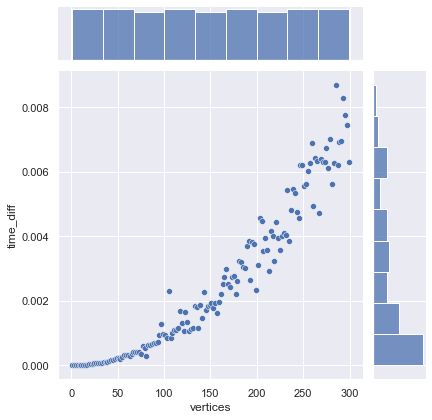

In [16]:
sb.jointplot(data = results_0, x = "vertices", y = "time_diff")

<AxesSubplot:xlabel='vertices', ylabel='link_time'>

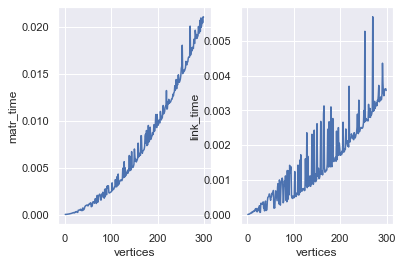

In [17]:
fig, ax = plt.subplots(1,2)
sb.lineplot(data = results_1, x = "vertices", y = "matr_time", ax = ax[0])
sb.lineplot(data = results_1, x = "vertices", y = "link_time", ax = ax[1])

References: 
---
https://www.geeksforgeeks.org/priority-queue-in-python/ 

https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/
